# In-Class Assignment: Machine learning with an SVM Classifier
# Day 19
# CMSE 202

### <p style="text-align: right;"> &#9989; **Put your name here** </p>
#### <p style="text-align: right;"> &#9989; Put your group member names here</p>

<img src="https://i.stack.imgur.com/7sFL3.png" width=400px>

### Agenda for today's class

1. [Review of Pre-Class assignment](#review)
2. [The SVM Classifier](#svm)
3. [Visualizing the boundary and the margins](#viz)
4. [Hyperparameter tuning (the effect of C)](#hyper-tuning)
   
### Imports:

In [36]:
# imports for the day
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn import svm

---
<a id="review"></a>
## 1. Review of Pre-Class assignment

We'll discussion any questions that came up as a class.

#### What does an SVM do? How do you define the "optimal" line of separation?

&#9989; **Do This:** In the pre-class, we reviewed what a Support Vector Machine (SVM) is and how it worked. We asked you to consider how you might draw an "optimal" line of separation of a 2-class problem. Discuss this with your group members now and record the answer below.

<font size=+3>&#9998;</font> Do This -  Write your discussion notes here.

---
<a id="svm"></a>
## 2. The SVM Classifier

As you watched in the pre-class videos, the basic idea of the Support Vector Machine classifier is as follows:

* The algorithm creates a line and marks the points from each class that are the "closest" to the line. These points are called the **support vectors**. In the image at the top, the black dots have one support vector and the white circles have two (two points equidistant from the line). We then compute the distance between the line and the support vectors. This distance is called the **margin**. 

* An SVM tries to make a decision boundary, in the form of a line, such that the separation between the two classes is as wide as possible.

In this class, we'll try running an SVM classifier and then see if we can judge how well it did. We can compare this to the line you made by hand in the pre-class assignment.

### 2.1 Classify your "blob" data

Let's pull your "blob" data and graph forward from the pre-class assignment and use it here as data to run an SVM classifier on. We know by inspection that the data is linearly separable and that you tried come up with the equation of a line that separates the two classes.  

&#9989; **Do This:** Using what you did in your pre-class assignment, recreate the blob data, your scatter plot and the line you drew to separate the blobs. It should be the case that blobs created with the same `random_state` should make the same blobs. Is that true? **If you didn't get all of this worked out in your pre-class assignment, check in with your group and see what they did!**

**It might be a good idea for everyone in your group to use the same `random_state` so you can compare more easily.**

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

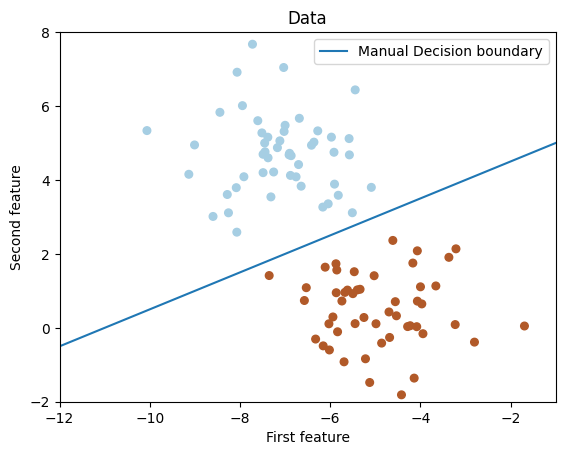

In [38]:
# make your blobs, scatter plot them and draw your line.
X, Y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.0, random_state=12)
x = np.linspace(-20, 10, 100)
y = 5.5 + x*0.5
plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=plt.cm.Paired) 
plt.ylim(-2,8)
plt.xlim(-12,-1)
plt.plot(x,y,label="Manual Decision boundary")
plt.title("Data")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.legend()

### 2.2 Running the SVM classifier

The basic process for making an SVM classifier, as with all classifiers, is a follows:

- create the model
- fit the model
- examine the result

Rather than trying to build an SVM classifier from scratch like you did with the Perceptron model, we're going to use the `sklearn` module. You can find the main scikit-learn documentation [here](https://scikit-learn.org/stable/user_guide.html).

To accomplish the steps above, you would use the `sklearn.svm.svc` (short for "Support Vector Classifier") to do the work. Here are some of the details.
- To build the model you would use `svm.SVC`. This constructor takes a number of parameters:
   - you can see all the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">parameters here</a>.
   - the most important are the first two:
      - **C** this is a parameter of how the fit is to be done. We will explore this later, for now the default is fine.
      - **kernel** for linear separability we are going to use the `"linear"` kernel. Note that the kernel name is a string.
   - The constructor also returns a model
- You then call `my_model.fit()` (or whatever you called your model variable) to fit the data. It takes two arguments:
   - The array of data. Its shape is (`n_samples`, `n_features`). That is, the provided array is `n_samples` large and each sample (each element in the array) is an array of `n_features`.
   - An array of class labels. It should be the size of `n_samples`, one for each data element. Typically these are integers.
- This function returns the same model you called `fit()` from (thus you don't need the return value)

**Note: we are not using `train_test_split` for this model, you will fit your SVM model to the whole data set. We are simply comparing the linear separation you guessed to the one SVC produces.**

&#9989; **Do This:** Create an SVC classifier using the `"linear"` kernel and with `C=10` (if you don't specify the value for `C` argument, it will use the default, which is `1.0`). Then, fit the model to your data. **Note**: you should not expect any meaningful output just yet, so as long as your call to `fit()` doesn't throw an error, you should be good to move on.

In [39]:
# build your classifier and call the fit function on your data here
my_model = svm.SVC(kernel='linear', C = 10)
my_model.fit(X,Y)

SVC(C=10, kernel='linear')

### 2.3 Upacking the SVM results

What information can we get from the fitted SVM? Remember that these fitted models have [a number of attributes and methods](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) that provide use with information regarding the fit.

There are some useful attributes:

- The attributes `coef_` and `intercept_` (note the underline) can be used to draw the the boundary the classifier created. We'll talk more about that below.
- The attribute `support_vectors_` are the coordinates of the support vectors used by the algorithm. In this case these are the 2D location of the data points that were determined to be the support vectors.

And some useful methods:

- `predict` takes single parameter, an array of shape (`number_of_data_to_predict`, `number_of_features`) and returns an array of class predictions.
- `decision_function` takes single parameter, an array of shape (`number_of_data_to_predict`, `number_of_features`) and returns the distance from the decision border for each datum. The sign indicates the class the datum belongs to.
- `score`, takes two parameters: array sample data of shape (`number_of_data_to_predict`, `number_of_features`) and array of size `number_of_data_to_predict` class labels and returns a percentage correct.

&#9989; **Do This:**  Explore some of the methods above and write a bit of code that prints the accuracy of our formed classifier. What function should you use for this? Check the accuracy using the same data you used for find the model fit -- does the result match your expectations?

In [40]:
print(f"the model has a decision function {my_model.decision_function(X)}")

the model has a decision function [ -8.16733217   4.03661581   5.60898476   4.65883515  -4.82982964
  -1.80480154   5.37033725   3.35286336  -2.71702729  -8.04148248
  -4.23657449   8.33310521  -5.02356772  -2.01936226   4.69792201
  -5.82551245  -6.07818347  -3.09633321  -7.06532324  -3.64679771
   1.6966438   -6.58583459   3.01773685   2.67424855   2.52996281
   4.59377149   4.91315332  -3.99436958   7.9117034    2.34344465
   1.88533734  -2.82901826  -3.80031369   4.8967211   -4.87173162
  -8.05565121   0.99984015   4.16073071   3.94545893   3.00841724
   2.03717969   6.48640369   5.74665582  -5.37310557   4.85952514
   5.90322598  -6.74483199  -6.13602727  -5.33057014  -2.98737432
  -4.21878828  -2.79093752   4.45358513   1.36691366   7.3707674
  -4.79849479  -7.22618482  -5.15962567   6.07544005   2.84779133
   1.38382515 -11.04413386  -3.96018863   5.66930082  -5.71807456
   2.87585714  -9.40401975   5.00669522   2.15647371  -4.33782844
  -4.35082405  -6.38325606  -2.09437995   3

In [60]:
# explore some of the functions from above and print the accuracy of your model for the data you provided above
X1, Y1 = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.0, random_state=12)
print(f"The accuracy of the model is {my_model.score(X1,Y1)*100}%")

The accuracy of the model is 100.0%


In [42]:
my_model.predict(X1)

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1])

---
<a id="viz"></a>
## 3. Visualizing the boundary and the margins

We won't go through the nitty-gritty details for "how" an SVM algorithm defines the optimal boundary -- the pre-class video described conceptually what is happening -- but we are going to try and get a few terms straight so we can plot some results and compare to our prediction.

### 3.1 What is a hyperplane?

A <a href="https://en.wikipedia.org/wiki/Hyperplane"> hyperplane </a> is geometric element whose dimensionality is one less than the space in which it is embedded. For our purposes, a hyperplane divides the embedded space. Thus:
- a 2D space can be divided by a 1D line
- a 3D space can be divided by a 2D plane
- and so on...
   
The data that we generated is in 2D and thus we are trying to find a 1D hyperplane -- a line -- to divide the space. In general, an SVM can search in any n-dimensional space and find a n-1 hyperplane (or at least find the best one it is capable of) that divides the space. SVM literature thus talks always about hyperplanes as a more general concept. For the moment we will be content with hyperplanes in 1D, **which are lines**.

### 3.2 Drawing the boundary

We are going to use the attributes of the fitted SVM to draw the line that was determined by the mode. First, let's remember that the equation of a line in slope-intercept format is:

$$ y = mx + b $$

Where $m$ is the slope and $b$ is the intercept. However, there is another form of a line equation that is called the "standard" form which is:

$$ Ax + By + C = 0 $$

where $A$ and $B$ are the **coefficients** of the line. You should be able to convert back and forth between these two forms relatively easily. We had to do this when thinking about how to draw the best fit line from the Perceptron model as well!

These standard coefficients are what are returned by the `.coef_` attributes of the classifier hyperplane. Assuming that we are doing a 2D (2 feature) classifier, the coefficients represent a line in standard format. Thus:

$$ Ax + By + C = 0 $$

then `.coef_` returns an array of $[A, B]$ and `intercept_` returns the $C$ value of the line.

By pulling that information from the model, you should be able to determine the slope-intercept form and draw the decision boundary through the "blobs". 

&#9989; **Do This:** Plot the blobs again along with your predicted line from the pre-class assignment **as well as the line from the model (i.e., the decision boundary)**.

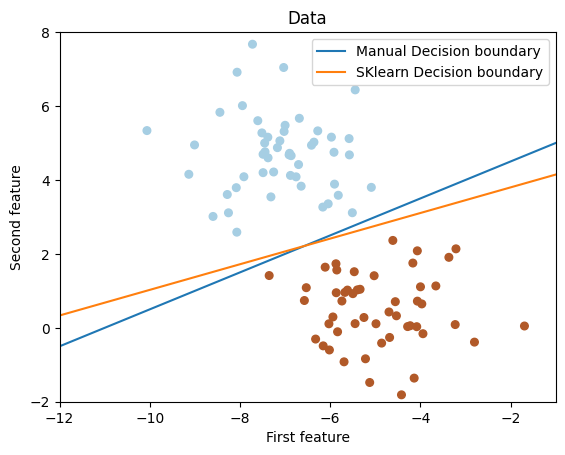

In [43]:
# your code to draw the blobs and the resulting decision boundary line
X, Y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.0, random_state=12)

# My guess of the decision boundary
x = np.linspace(-20, 10, 100)
y_manual = 5.5 + x*0.5

#SKlearn decision boundary
y_predicted = (-my_model.intercept_[0] - my_model.coef_[0][0] * x) / my_model.coef_[0][1]

#Plotting the data
plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=plt.cm.Paired) 
plt.ylim(-2,8)
plt.xlim(-12,-1)
plt.plot(x,y_manual,label="Manual Decision boundary")
plt.plot(x,y_predicted,label="SKlearn Decision boundary")
plt.title("Data")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.legend()

&#9989; **Question:** How well do your guess and the decision boundary agree? Is the decision boundary rotated at all when compared to your guess? If so, why would it be rotated that way?

<font size=+3>&#9998;</font> My guess and the Sklearn's model both separate the data in 2 effectively, however the method changed the line a little bit.

&#9989; **Do This:** Print the slope and the intercept you have calculated. Three decimal points of accuracy will do. **Confirm that these numbers match the line representing the decision boundary in your plot.**

In [44]:
# print the slope and intercept here
print(f"the slope of the sklearn model is {-my_model.coef_[0][0]/my_model.coef_[0][1]:.3f} and the intercept is {-my_model.intercept_[0]/ my_model.coef_[0][1]:.3f}")

the slope of the sklearn model is 0.347 and the intercept is 4.492


I checked and it is the right line

### 3.3 Draw the Support Vectors
Remember that the attribute `support_vectors_` (note the trailing underline) of the model yields a list of points that are used as support vectors. 

&#9989; **Do This:** Using `support_vectors_`, redraw the blobs and boundary but now also mark the support vectors the algorithm used to determine the boundary. If you have trouble-coming up with a good way of marking the support vectors, chat with your group to brainstorm ideas!

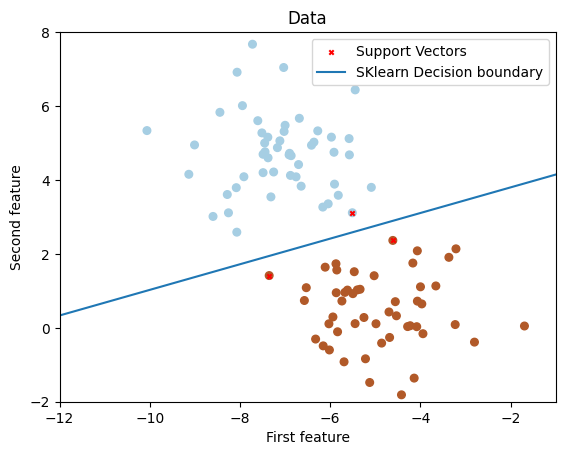

In [54]:
# draw now with support vectors

# Getting the support vectors
SV = my_model.support_vectors_

# your code to draw the blobs and the resulting decision boundary line
X, Y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.0, random_state=12)

#SKlearn decision boundary
y_predicted = (-my_model.intercept_[0] - my_model.coef_[0][0] * x) / my_model.coef_[0][1]

#Plotting the data
plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=plt.cm.Paired) 
plt.scatter(SV[:,0],SV[:,1],color="red",marker="x", label="Support Vectors", s = 10)
plt.ylim(-2,8)
plt.xlim(-12,-1)
plt.plot(x,y_predicted,label="SKlearn Decision boundary")
plt.title("Data")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.legend()

### 3.4 SVM Margins

Besides drawing the boundary, the SVM tries to draw a **margin**, a set of parallel lines on either side of the boundary. You learned about this in the pre-class video.

This width of this margin is controlled by the `C` parameter. When you create the model (the `C` parameter is always positive), `C` tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of `C`, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of `C` will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of `C`, you should get misclassified examples, often even if your training data is linearly separable. 

* Large `C` - better job of classifying training data; smaller margin
* Smaller `C` - more misclassifcations; larger margin

#### 3.4.1 Calculating the margin

Below, we have written a function that can help you draw the margins so that you can see the effect that `C` has on the SVM results. To think about how this works, let's look at the image from the top of the notebook again:

<img src="https://i.stack.imgur.com/7sFL3.png" width=300px>

The way that margins are determined follows this procedure:

- Looking at the image, the distance between the two margins is always $\frac{2}{\| w \|}$, and the distance from the boundary to one margin half that value (the margins are equidistant from the boundary)
   - $w$ is the vector $[A,B]$ (the coefficients of x and y in standard form), so $\| w \| = \sqrt{A^2 + B^2} $ and the margin distance is therefore $\frac{1}{\sqrt{A^2 + B^2}} $
- Given the boundary line x and y arrays, the updated $y_{margin-down}$ array is: $ y - \sqrt{1 + m^2} $ and $y_{margin-up}$ array is: $y + \sqrt{1 + m^2} $

#### 3.4.2 Describing the function `margin_y_fn`

The function below, `margin_y_fn`, takes 3 arguments:
- the y array of values of the boundary line
- The `A` coefficient from the fit
- The `B` coefficient from the fit

It returns two values:
- an array of y values for the lower margin (given the same x values as the boundary line)
- an array of y values for the upper margin (also given the same x values as the boundary line).

The function appears below. Make sure to run it before trying the next task.

In [46]:
def margin_y_fn(y, A, B):
    slope = -A/B
    margin_dist = 1/np.sqrt(A**2 + B**2)
    y_down = y - np.sqrt(1 + slope** 2) * margin_dist
    y_up = y + np.sqrt(1 +  slope** 2) * margin_dist
    return y_down, y_up

&#9989; **Do This:**  Using the function `margin_y_fn`, make a plot with: the blobs, the boundary, the support vectors, and, now, the margins.

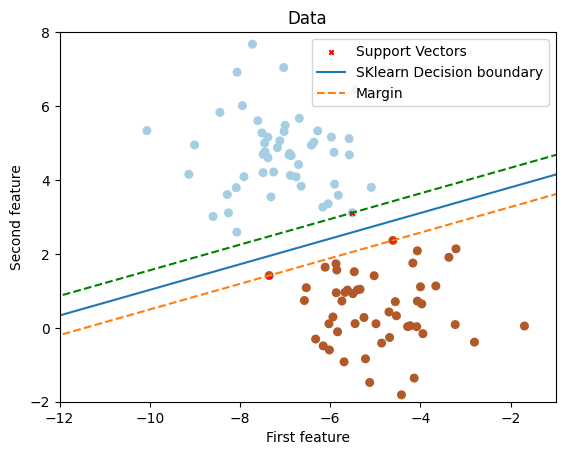

In [57]:
# finding y values for both margins
y_down, y_up = margin_y_fn(y_predicted, my_model.coef_[0][0], my_model.coef_[0][1])

# Getting the support vectors
SV = my_model.support_vectors_

# your code to draw the blobs and the resulting decision boundary line
X, Y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.0, random_state=12)

#SKlearn decision boundary
y_predicted = (-my_model.intercept_[0] - my_model.coef_[0][0] * x) / my_model.coef_[0][1]

#Plotting the data
plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=plt.cm.Paired) 
plt.scatter(SV[:,0],SV[:,1],color="red",marker="x", label="Support Vectors", s = 10)
plt.ylim(-2,8)
plt.xlim(-12,-1)
plt.plot(x,y_predicted,label="SKlearn Decision boundary")
plt.plot(x, y_down, "--", label="Margin")
plt.plot(x, y_up, "--", color = "green")
plt.title("Data")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.legend()

---
<a id="hyper-tuning"></a>
## 4. Hyperparameter tuning (the effect of `C`)

As we discussed the parameter `C` controls that amount of misclassification that is acceptable:

* Large `C` - better job of classifying training data; smaller margin
* Smaller `C` - more misclassifcations; larger margin

In this last section, we will look into the effect of choosing a different value of `C` for the same data. We will pull together all the work you have done so far into a single cell. 

&#9989; **Do This:** Below, copy and paste all the necesssary code that you wrote above such that the cell below does the following:

* make your fake data
* create an SVC model and fit it to your data
* calculate the decision boundaries
* plot the data, the optimal line, the decision boundaries and the support vectors, and
* print the accuracy.

Make sure you run the cell and confirm that it produces the output you expect.

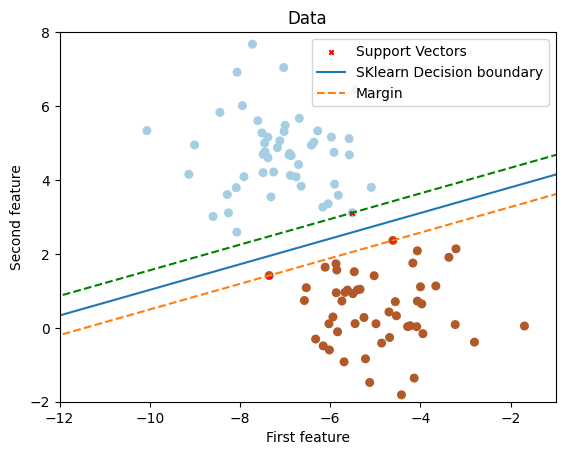

In [59]:
# build your classifier and call the fit function on your data here
# make your blobs, scatter plot them and draw your line.
X, Y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.0, random_state=12)
my_model = svm.SVC(kernel='linear', C = 10)
my_model.fit(X,Y)
SV = my_model.support_vectors_
y_down, y_up = margin_y_fn(y_predicted, my_model.coef_[0][0], my_model.coef_[0][1])
x = np.linspace(-20, 10, 100)
y = (-my_model.intercept_[0] - my_model.coef_[0][0] * x) / my_model.coef_[0][1]
plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=plt.cm.Paired) 
plt.scatter(SV[:,0],SV[:,1],color="red",marker="x", label="Support Vectors", s = 10)
plt.ylim(-2,8)
plt.xlim(-12,-1)
plt.plot(x,y_predicted,label="SKlearn Decision boundary")
plt.plot(x, y_down, "--", label="Margin")
plt.plot(x, y_up, "--", color = "green")
plt.title("Data")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.legend()


In [62]:
# explore some of the functions from above and print the accuracy of your model for the data you provided above
print(f"The accuracy of the model is {my_model.score(X1,Y1)*100}%")

The accuracy of the model is 100.0%


### 4.1 Automate the process to explore the effect of "C"

Now that you have pulled at that code together and checked that it works, put it inside a function called `test_C_parameter` that runs all that code and takes the following arguments:
* `C` - the hyperparamter that controls misclassifications
* `random_state` - the state associated with the created data

Then run the function using a variety of choices for `C` to observe how the margins change. You might need to change `random_state` to get distributions of blobs that overlap a bit more in order to really understand how changing `C` influences the results.

In [138]:
# put any an all code you need here, create additional cells as necessary

def c_explorer(c, ax):
    X, Y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.0, random_state=5)
    my_model = svm.SVC(kernel='linear', C = c)
    my_model.fit(X,Y)
    SV = my_model.support_vectors_
    x = np.linspace(min(X[:,0]*1.2), max(X[:,0]*1.2), 100)
    y_predicted = (-my_model.intercept_[0] - my_model.coef_[0][0] * x) / my_model.coef_[0][1]
    y_down, y_up = margin_y_fn(y_predicted, my_model.coef_[0][0], my_model.coef_[0][1])
    ax.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=plt.cm.Paired) 
    ax.scatter(SV[:,0],SV[:,1],color="red",marker="x", label="Support Vectors", s = 10)
    ax.plot(x,y_predicted,label="SKlearn Decision boundary")
    ax.plot(x, y_down, "--", label="Margin")
    ax.plot(x, y_up, "--", color = "green")
    ax.set_title(f"The accuracy for c = {c} is of {my_model.score(X,Y)*100}%")
    ax.set_xlabel("First feature")
    ax.set_ylabel("Second feature")
    ax.set_xlim(min(X[:,0]*1.1), max(X[:,0]*1.1))
    ax.legend()

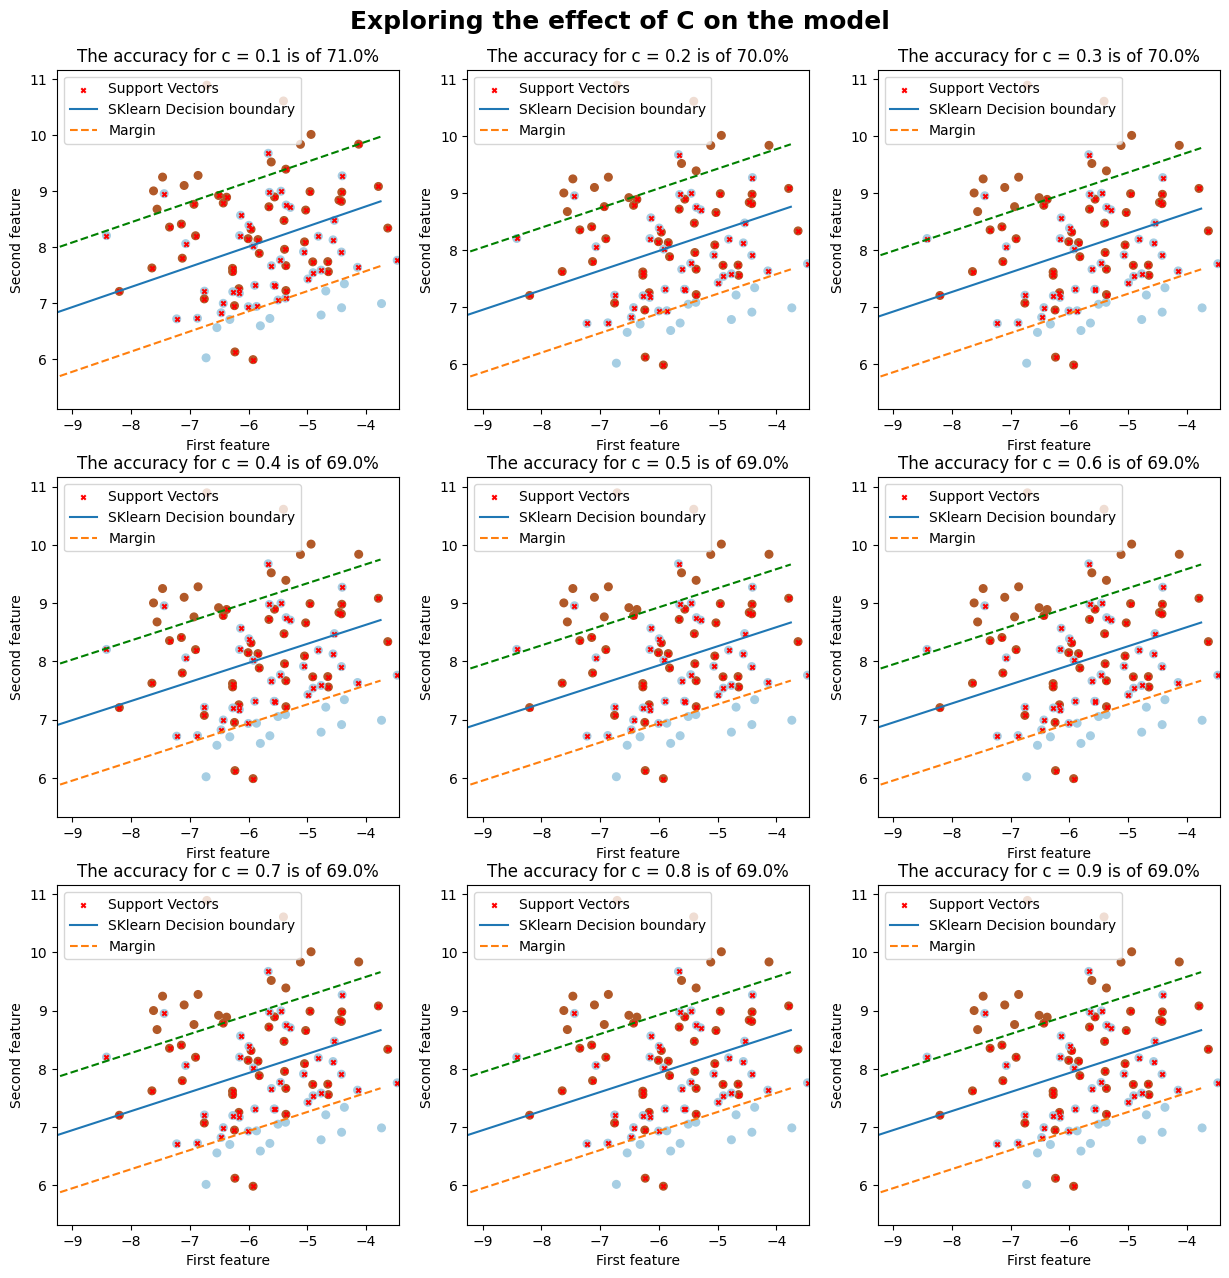

In [139]:
fig, ax = plt.subplots(3, 3, figsize=(15,15))
ax = ax.flatten()
c_values = (np.arange(9) + 1)/10
plt.suptitle("Exploring the effect of C on the model", y = 0.92, fontsize = 18, weight = "bold")
for i, c in enumerate(c_values):
    c_explorer(c, ax[i])

&#9989; **Question:** What do you notice about changing `C` in terms of the properties of the margins and the misclassifications?

<font size=+3>&#9998;</font> i'm going to be honest, I don't know what to make of this results, I have found a situation where the inverse of what is expected happens, as c increases the accuracy of the model is reduced, I guess the relation of C to the fit of the data is heavily dependant on how distinct the 2 classes are.

-----
### Congratulations, we're done!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's submission folder (Don't forget to add your names in the first cell).


&#169; Copyright 2023 Department of Computational Mathematics, Science and Engineering at Michigan State University